In [1]:
import pandas as pd
data=pd.read_csv("/content/sample_data/CopyofBrentOilPrices.csv.csv")
data.head()

,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


In [2]:
data.dtypes

,0
Date,object
Price,float64


In [3]:
data["Date"]=pd.to_datetime(data["Date"])
data.dtypes

<ipython-input-3-205d976badb5>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["Date"]=pd.to_datetime(data["Date"])


,0
Date,datetime64[ns]
Price,float64


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from arch import arch_model


In [4]:
!pip install arch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 982.9/982.9 kB 13.0 MB/s eta 0:00:00


In [6]:
data.isnull().sum()

,0
Date,0
Price,0


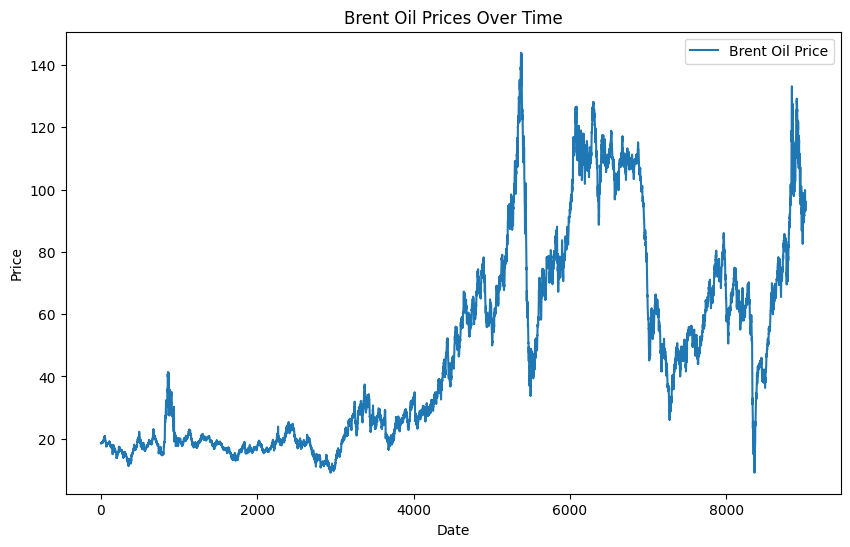

In [7]:
plt.figure(figsize=(10, 6))
plt.plot(data['Price'], label='Brent Oil Price')
plt.title('Brent Oil Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Price   No. Observations:                 9011
Model:                 ARIMA(5, 1, 2)   Log Likelihood              -14519.549
Date:                Sun, 03 Nov 2024   AIC                          29055.098
Time:                        11:03:43   BIC                          29111.947
Sample:                             0   HQIC                         29074.441
                               - 9011                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0758      0.006     12.141      0.000       0.064       0.088
ar.L2         -1.0104      0.006   -166.534      0.000      -1.022      -0.999
ar.L3          0.0311      0.008      4.064      0.0

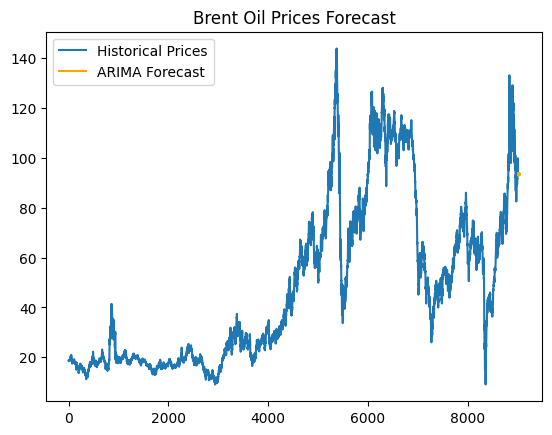

In [10]:
from pmdarima import auto_arima

# Fit an ARIMA model
arima_model = ARIMA(data['Price'], order=(5, 1, 2))  # Example order, tune as needed
arima_results = arima_model.fit()
print(arima_results.summary())

# Forecast using ARIMA
arima_forecast = arima_results.forecast(steps=30)
plt.plot(data['Price'], label='Historical Prices')
plt.plot(arima_forecast, label='ARIMA Forecast', color='orange')
plt.title('Brent Oil Prices Forecast')
plt.legend()
plt.show()

In [9]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 20.0 MB/s eta 0:00:00


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0006377. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


Iteration:      1,   Func. Count:      6,   Neg. LLF: 2334841936.069401
Iteration:      2,   Func. Count:     18,   Neg. LLF: -22203.304018635485
Optimization terminated successfully    (Exit mode 0)
            Current function value: -22203.30402933981
            Iterations: 6
            Function evaluations: 18
            Gradient evaluations: 2
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                  Price   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                22203.3
Distribution:                  Normal   AIC:                          -44398.6
Method:            Maximum Likelihood   BIC:                          -44370.2
                                        No. Observations:                 9010
Date:                Sun, Nov 03 2024   Df Residuals:                     9009
Time:         

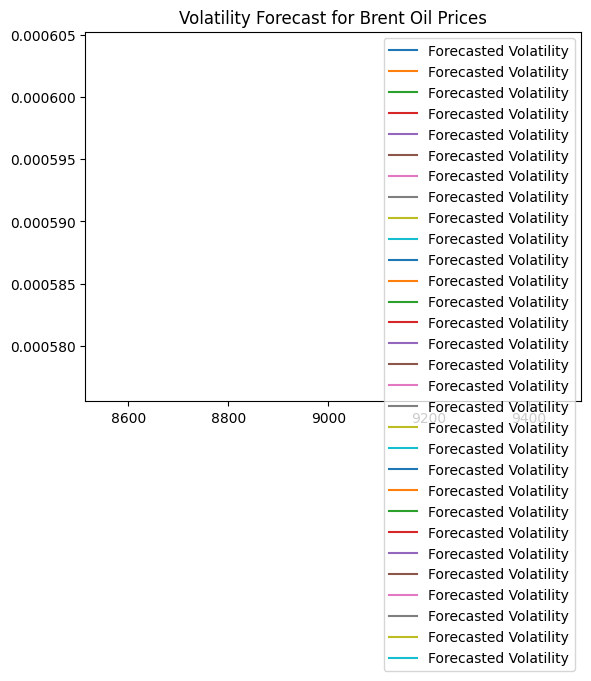

In [11]:
returns = data['Price'].pct_change().dropna()  # Calculate returns for volatility modeling
garch_model = arch_model(returns, vol='Garch', p=1, q=1)
garch_results = garch_model.fit()
print(garch_results.summary())

# Forecast volatility
garch_forecast = garch_results.forecast(horizon=30)
plt.plot(garch_forecast.variance[-1:], label='Forecasted Volatility')
plt.title('Volatility Forecast for Brent Oil Prices')
plt.legend()
plt.show()

In [12]:
from statsmodels.tsa.stattools import adfuller

# Perform the Augmented Dickey-Fuller test
adf_result = adfuller(data['Price'].dropna())
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])

# Interpretation
if adf_result[1] > 0.05:
    print("The series is non-stationary. Differencing is required.")
else:
    print("The series is stationary. Proceed without differencing.")


ADF Statistic: -1.9938560113924675
p-value: 0.28927350489340287
The series is non-stationary. Differencing is required.


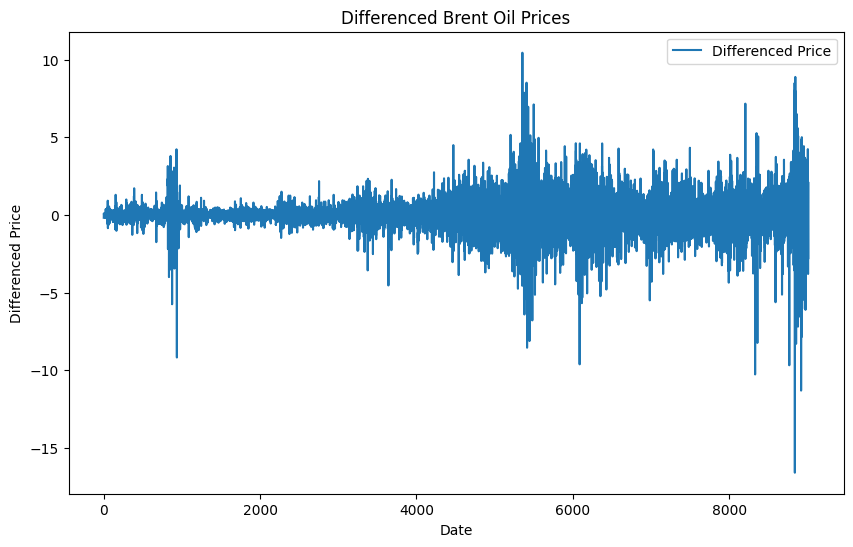

In [13]:
# Apply differencing if needed
data['Price_diff'] = data['Price'].diff().dropna()

# Plot the differenced series to verify
plt.figure(figsize=(10, 6))
plt.plot(data['Price_diff'], label='Differenced Price')
plt.title('Differenced Brent Oil Prices')
plt.xlabel('Date')
plt.ylabel('Differenced Price')
plt.legend()
plt.show()


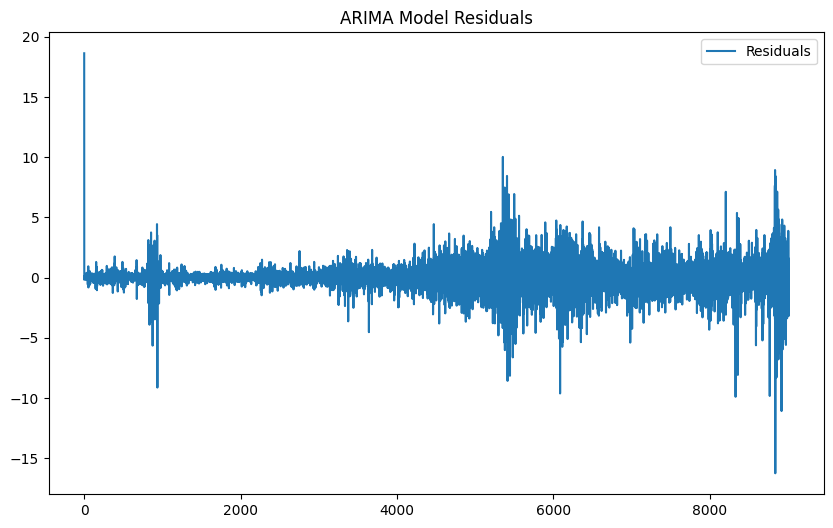

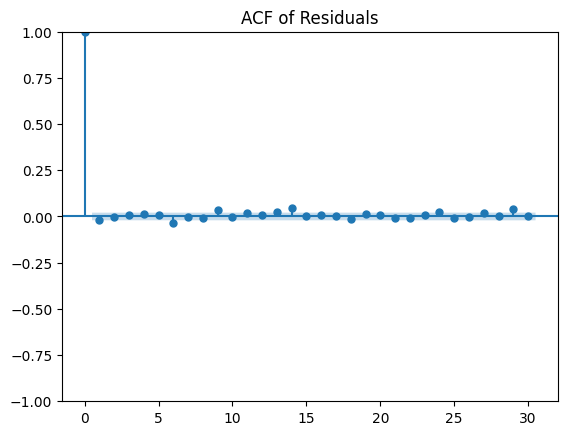

In [14]:
# Plot residuals
residuals = arima_results.resid

plt.figure(figsize=(10, 6))
plt.plot(residuals, label='Residuals')
plt.title('ARIMA Model Residuals')
plt.legend()
plt.show()

# Check residuals for autocorrelation
sm.graphics.tsa.plot_acf(residuals, lags=30)
plt.title('ACF of Residuals')
plt.show()


In [15]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Perform the Ljung-Box test
lb_test = acorr_ljungbox(residuals, lags=[10], return_df=True)
print("Ljung-Box Test Results:")
print(lb_test)


Ljung-Box Test Results:
      lb_stat  lb_pvalue
10  27.740199   0.001986


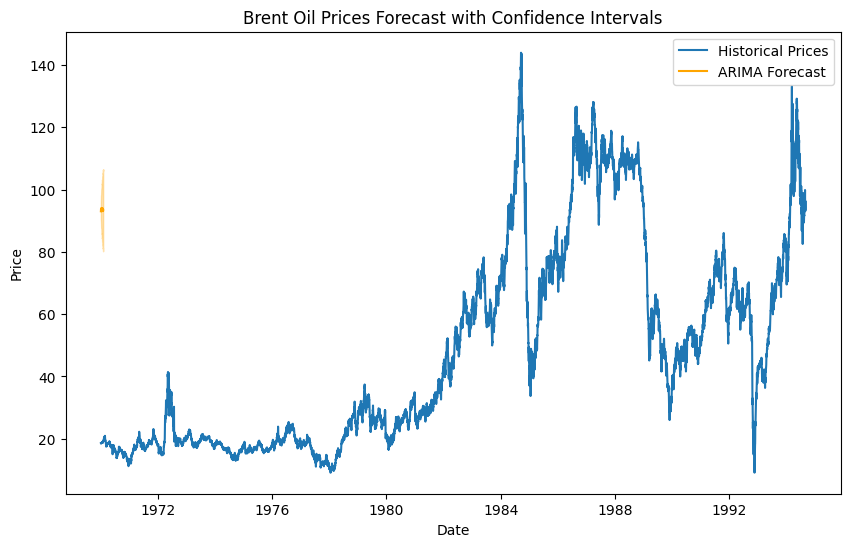

In [22]:
# Forecast with confidence intervals
forecast_steps = 30
forecast_df = arima_results.get_forecast(steps=forecast_steps).summary_frame()

# Extract the necessary columns
forecast = forecast_df['mean']
stderr = forecast_df['mean_se']
conf_int = forecast_df[['mean_ci_lower', 'mean_ci_upper']].values  # Extract as a 2D array for plotting

# Plot forecast with confidence intervals
plt.figure(figsize=(10, 6))
plt.plot(data['Price'], label='Historical Prices')
plt.plot(pd.date_range(data.index[-1], periods=forecast_steps, freq='D'), forecast, label='ARIMA Forecast', color='orange')
plt.fill_between(pd.date_range(data.index[-1], periods=forecast_steps, freq='D'), conf_int[:, 0], conf_int[:, 1], color='orange', alpha=0.3)
plt.title('Brent Oil Prices Forecast with Confidence Intervals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


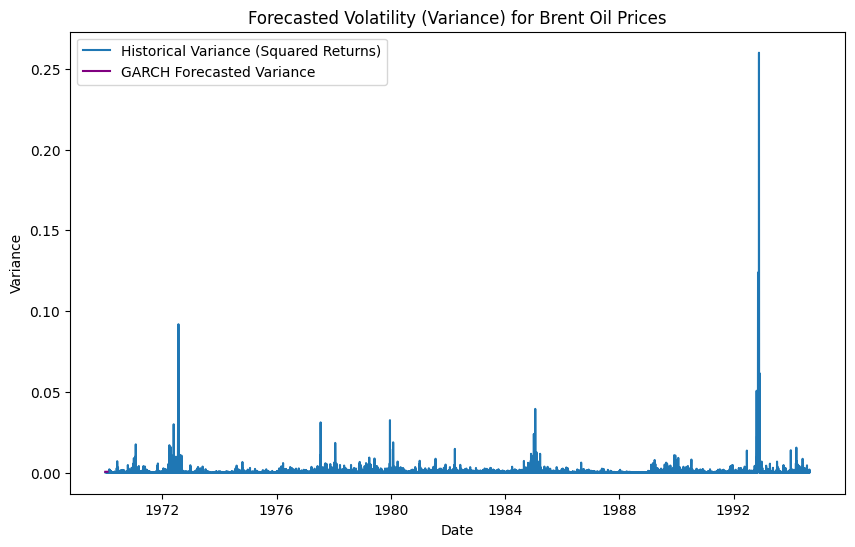

In [18]:
# Forecast volatility for the next 30 days
garch_forecast = garch_results.forecast(horizon=30)
forecast_variance = garch_forecast.variance.iloc[-1].values  # Variance forecast

# Plot historical and forecasted volatility
plt.figure(figsize=(10, 6))
plt.plot(returns.index, returns ** 2, label='Historical Variance (Squared Returns)')
plt.plot(pd.date_range(returns.index[-1], periods=30, freq='D'), forecast_variance, label='GARCH Forecasted Variance', color='purple')
plt.title('Forecasted Volatility (Variance) for Brent Oil Prices')
plt.xlabel('Date')
plt.ylabel('Variance')
plt.legend()
plt.show()


In [24]:
# Create a summary of model metrics and assumptions
summary = {
    'Model': ['ARIMA', 'GARCH'],
    'Purpose': ['Trend Forecasting', 'Volatility Forecasting'],
    'Parameters': [f'p: {arima_results.model.order[0]}, d: {arima_results.model.order[1]}, q: {arima_results.model.order[2]}', 'p: 1, q: 1'],
    'Assumptions': [
        'Stationarity of data, no autocorrelation in residuals',
        'Volatility clustering in data'
    ]
}
summary_df = pd.DataFrame(summary)
print(summary_df)


   Model                 Purpose        Parameters  \
0  ARIMA       Trend Forecasting  p: 5, d: 1, q: 2   
1  GARCH  Volatility Forecasting        p: 1, q: 1   

                                         Assumptions  
0  Stationarity of data, no autocorrelation in re...  
1                      Volatility clustering in data  


In [25]:
# Install Streamlit with: pip install streamlit

import streamlit as st

# Streamlit code for a simple dashboard
st.title("Brent Oil Prices Analysis Dashboard")

# Display historical data and forecasts
st.subheader("Historical Brent Oil Prices")
st.line_chart(data['Price'])

st.subheader("ARIMA Forecast with Confidence Interval")
st.line_chart(pd.DataFrame({'ARIMA Forecast': forecast, 'Lower Bound': conf_int[:, 0], 'Upper Bound': conf_int[:, 1]}, index=pd.date_range(data.index[-1], periods=forecast_steps, freq='D')))

st.subheader("Forecasted Volatility (Variance)")
st.line_chart(pd.DataFrame(forecast_variance, index=pd.date_range(returns.index[-1], periods=30, freq='D'), columns=['Forecasted Variance']))


2024-11-03 11:11:25.232 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-03 11:11:25.235 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-03 11:11:25.240 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-03 11:11:25.245 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-03 11:11:25.327 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-03 11:11:25.329 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-03 11:11:25.332 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-11-03 11:11:25.335 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

DeltaGenerator()

In [20]:
!pip install Streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 63.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 79.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 6.7 MB/s eta 0:00:00
